#  LU3MA201 : Projet / Travail d’étude et de recherche

# 2  Reconnaissance de chiﬀres manuscrits par la SVD

<div id="ch:method_1"></div>

**Les instructions suivantes permettent de charger les données de chiffres manuscrits disponibles dans les fichiers base_apprentissage.mat et base_test.mat :**

In [1]:
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

mat = spi.loadmat("base_test.mat")
data_test = np.transpose(mat['data'])
label_test = np.array(mat['label'])[0]
label_test =label_test.astype(int)

mat=spi.loadmat("base_apprentissage.mat")
data_app=np.transpose(mat['data'])
label_app=np.array(mat['label'])[0] #label: chiffre numérisé
label_app=label_app.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

<div id="ch:method_1"></div>

**Notre deuxième programme de classification est basé sur l'algorithme suivant:**

* **Etape 1:** Pour chaque chiffre $i$, on concaténe les vecteurs représentant $i$ dans une grande matrice $D_i$.

In [4]:
l_app=len(data_app)
l_test=len(data_test)
D_0=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==0])
D_1=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==1])
D_2=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==2])
D_3=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==3])
D_4=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==4])
D_5=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==5])
D_6=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==6])
D_7=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==7])
D_8=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==8])
D_9=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==9])

<div id="method_1"></div>

* **Etape 2:** Soit la **SVD** pour $D_i$:   $D_i=U_i \Sigma_i V_i^{t}$. Pour chaque $i \in[0,9]$, on calcule $U_i$.


In [5]:
U_0=np.linalg.svd(D_0)[0]
U_1=np.linalg.svd(D_1)[0]
U_2=np.linalg.svd(D_2)[0]
U_3=np.linalg.svd(D_3)[0]
U_4=np.linalg.svd(D_4)[0]
U_5=np.linalg.svd(D_5)[0]
U_6=np.linalg.svd(D_6)[0]
U_7=np.linalg.svd(D_7)[0]
U_8=np.linalg.svd(D_8)[0]
U_9=np.linalg.svd(D_9)[0]

U=[U_0,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9]

<div id="method_1"></div>

* **Etape 3:** Pour un vecteur $v$ de la base de test et pour $i \in [0.9]$, on calcule le résidu relatif $r_{i,v}=\frac{1}{||v||_2}||v-U_{i,k}U_{i,k}^tv||_2$ pour $k=10$. On classifie le $v$ au chiffre $i$ qui minimise le résidu $r_{i,v}$.

In [9]:
def estim(v):
    résidus=[np.linalg.norm(v-U[i][:,:29]@(np.transpose(U[i][:,:29])@v))/np.linalg.norm(v) for i in range(10)] 
    return résidus.index(min(résidus)) 

<div id="method_1"></div>

* **Etape 5 :** Estimation du pourcentage de prédictions correctes pour chaque chiffre.

In [10]:
def precis(j):
    list_d=[data_test[k] for k in range(l_test) if label_test[k]==j]
    a=len(list_d)
    list_la=[estim(list_d[k]) for k in range(a)]
    return list_la.count(j)/a 

In [13]:
precision_bases_scindees=[precis(j) for j in range(10)]
for i in range(10):
    print("précision pour le chiffre", i ,"est de" , precision_bases_scindees[i]*100, "%")
print("précision totale de la SVD est de" , sum(precision_bases_scindees)*10, "%")

précision pour le chiffre 0 est de 98.60805860805861 %
précision pour le chiffre 1 est de 99.11223842739378 %
précision pour le chiffre 2 est de 94.84098939929328 %
précision pour le chiffre 3 est de 94.03089887640449 %
précision pour le chiffre 4 est de 95.56541019955654 %
précision pour le chiffre 5 est de 93.4959349593496 %
précision pour le chiffre 6 est de 97.42304939155333 %
précision pour le chiffre 7 est de 95.5123911587408 %
précision pour le chiffre 8 est de 92.39940387481371 %
précision pour le chiffre 9 est de 94.58689458689459 %
précision totale de la SVD est de 95.55752694820586 %


### Résultats quand la base de test est prise dans la base d'apprentissage

*On ajoute le code suivant pour le test overfit* : on prend pour base de test les 14000 premiers éléments de la base d'app (14000 etant le nombre d'éléments de la base de test habituelle)

In [30]:
data_test_overfit=data_app[:14000,:] 
label_test_overfit=label_app[:14000]

De plus, on modifie un peu le code de l'étape 5 :

In [31]:
def precis_overfit(j):
    list_d=[data_test_overfit[k] for k in range(l_test) if label_test_overfit[k]==j]
    a=len(list_d)
    list_la=[estim(list_d[k]) for k in range(a)]
    return list_la.count(j)/a 

In [32]:
precision_same_base=[precis_overfit(j) for j in range(10)]
for i in range(10):
    print("précision pour le chiffre", i ,"est de" , precision_same_base[i]*100, "%")
print("précision totale de la SVD est de" , sum(precision_same_base)*10, "%")

précision pour le chiffre 0 est de 98.58557284299859 %
précision pour le chiffre 1 est de 99.10141206675225 %
précision pour le chiffre 2 est de 95.23131672597864 %
précision pour le chiffre 3 est de 95.16348773841962 %
précision pour le chiffre 4 est de 97.1299093655589 %
précision pour le chiffre 5 est de 94.74497681607419 %
précision pour le chiffre 6 est de 97.03196347031964 %
précision pour le chiffre 7 est de 95.3125 %
précision pour le chiffre 8 est de 93.23529411764706 %
précision pour le chiffre 9 est de 94.82386772106398 %
précision totale de la SVD est de 96.03603008648129 %


### Comparaison graphique et numérique  

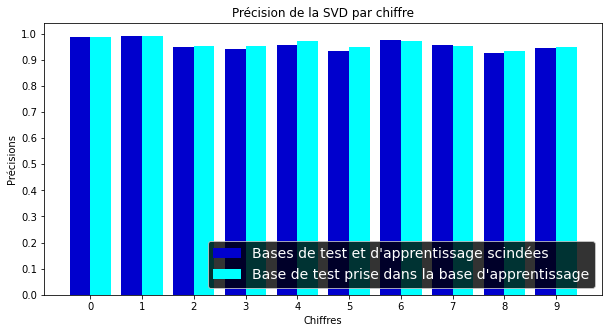

In [33]:
plt.figure(figsize=(10,5))
plt.title('Précision de la SVD par chiffre')
x=[i for i in range(10)]
plt.bar(x,precision_bases_scindees,width=-0.4, align='edge', label='Bases de test et d\'apprentissage scindées',color='mediumblue')
plt.bar(x,precision_same_base,width=0.4, align='edge', label='Base de test prise dans la base d\'apprentissage',color='cyan')
plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend(loc='lower right',prop={'size': 14},facecolor='k', labelcolor='w')
plt.show()

Calcul numérique de l'écart maximum entre ces deux méthodes

In [34]:
Ecart_max=np.max(np.abs(np.array(precision_same_base)-np.array(precision_bases_scindees)))
print(Ecart_max)

0.015644991660023644
